# Predicting sea level changes with linear regression

In [2]:
#datasource:https://www.epa.gov/climate-indicators/climate-change-indicators-sea-level

import os
os.chdir("C:/Users/Muskan/Downloads")

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#importing the dataset containing average absolute global sea level changes in inches till 2013
sea_level_df=pd.read_csv("sea-level.csv")

sea_level_df.head()

,Year,CSIRO - Adjusted sea level_inches,CSIRO - Lower error bound (inches),CSIRO - Upper error bound (inches),Unnamed: 4
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


Predictor and Response variable

In [23]:
#Sea level changes will be predicted based on years
x=sea_level_df['Year'] #Predictor Variable
y=sea_level_df['CSIRO - Adjusted sea level_inches'] #Response variable

Establishing relationship between Year and Sea Level

<AxesSubplot:xlabel='Year', ylabel='CSIRO - Adjusted sea level_inches'>

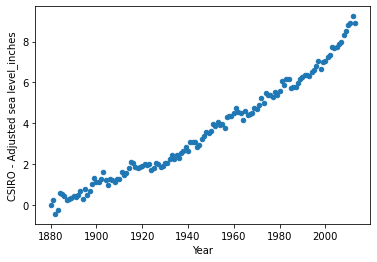

In [24]:
#establishing relationship between two continous variables can be done by a scatter plot 
sea_level_df.plot.scatter(x='Year',y='CSIRO - Adjusted sea level_inches')

Least Squares Linear Regression 

In [25]:
#Fitting a regression model with Year as predictor and Sea Level Change as the reponse variable
from scipy.stats import linregress 
regression_model=linregress(sea_level_df['Year'],sea_level_df['CSIRO - Adjusted sea level_inches'])
regression_model

LinregressResult(slope=0.0628765374624721, intercept=-118.74277636667209, rvalue=0.9853415819164769, pvalue=2.924295915522909e-103, stderr=0.0009474930061257325, intercept_stderr=1.8446592634400003)

Predicting sea level changes till the year 2050

In [34]:
years_2050_pred=np.arange(x.min(),2050,1) #making an array of years from 1880-2050
print(years_2050_pred[0:5]) #checking values in the array

#sea level change predictions based on the slope and intercept of the regression model stored in an array

level_2050_pred=years_2050_pred*regression_model.slope + regression_model.intercept

print(level_2050_pred[169]) #checking a random year predicted value 

[1880 1881 1882 1883 1884]
10.09124889393324


Plotting a Best Fit line for the predicted years 

<ipython-input-49-a5a0da6b7f15>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1= plt.axes()


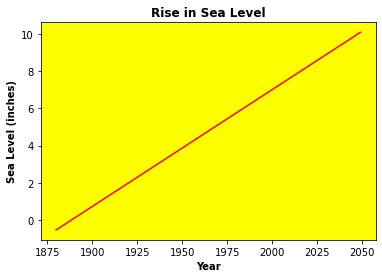

In [49]:
# both years_2050_pred and level_2050_pred are arrays with years and sea level change predictions
plt.plot(years_2050_pred,level_2050_pred,"r")

#Line of best fit shows sea levels changes rising as years pass by 
plt.xlabel('Year',fontweight='bold')
plt.ylabel('Sea Level (inches)',fontweight='bold')
plt.title('Rise in Sea Level',fontweight='bold')

#Setting the background color of the plot using set_facecolor() method
ax1= plt.axes()
ax1.set_facecolor("yellow")

No handles with labels found to put in legend.
<ipython-input-51-bc83a103ab4b>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


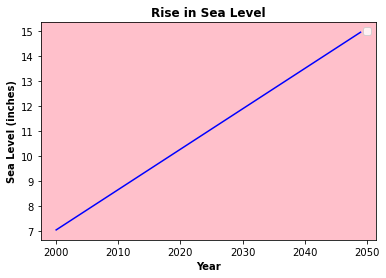

In [51]:
#Creating a second line of best fit for years 2000-2050
df_2000 = sea_level_df[sea_level_df['Year'] >= 2000]


regression_model_B = linregress(df_2000['Year'], df_2000['CSIRO - Adjusted sea level_inches'])
years_2050_pred_B = np.arange(2000,2050,1)
level_2050_pred_B = years_2050_pred_B*regression_model_B.slope + regression_model_B.intercept

plt.plot(years_2050_pred_B,level_2050_pred_B,"b")

plt.xlabel('Year',fontweight='bold')
plt.ylabel('Sea Level (inches)',fontweight='bold')
plt.title('Rise in Sea Level',fontweight='bold')

#Setting the background color of the plot using set_facecolor() method
ax = plt.axes()
ax.set_facecolor("pink")

#### Conclusion:Sea Levels will continue to rise through 2050 at the current pace of climate change